# Support Vector Regression

## Importing Required Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [53]:
# Read data from data.csv file by using Pandas read_csv() command
data = pd.read_csv('./Position_Salaries.csv')

# print dataset into console
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [54]:
# Seperate data as Input vs Result
X = data.iloc[ : , 1:-1].values # this will storte all values into X variable expect last column
Y = data.iloc[ : , -1].values # this will storte all last colomn values into y variable

# view dataset into console
X
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [55]:
print(X,'\n')
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [56]:
# X is in 2D array but Y is in 1D array, so reshape Y in to 2D
Y = Y.reshape(len(Y), 1)

In [57]:
# now Y changed to 2D array
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling


In [58]:
# Import Standard Scaler from sklearn > preprocessing
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler();
sc_y = StandardScaler();
# In above we're created sc_x, sc_y beacuse we're fit transform for X and Y in seperate standardsacaler so that we created

# Fit transfom for X data
x = sc_x.fit_transform(X)
# Fit Transform for Y data
y = sc_y.fit_transform(Y)

In [59]:
print(x,'\n')
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the Whole dataset
SVR function expecting input parameter , need to say waht kind of Suppor Vector Regression we're using - now using 'rbf' - Gaussian radial basis function (RBF)
for More info : https://data-flair.training/blogs/svm-kernel-functions/

In [60]:
# import SVR from sklearn > SVM
from sklearn.svm import SVR
# SVR function expecting input parameter , need to say waht kind of Suppor Vector Regression we're using - now using 'rbf'
regression = SVR(kernel='rbf')

# Fit model into our data set
regression.fit(x, y)

c:\Softwares\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualising the SVR Result

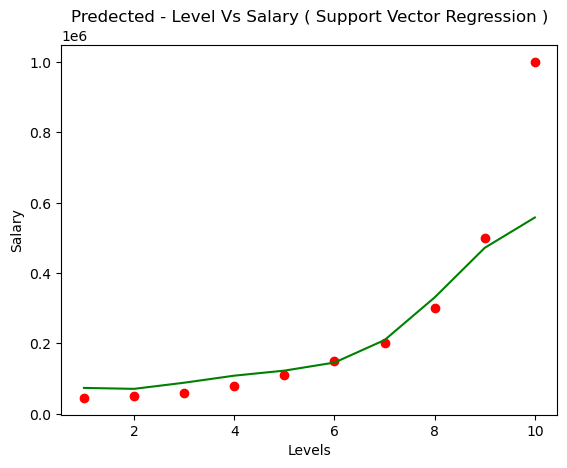

In [61]:
# using Scatter plot to visuallising our Linear model
plt.scatter( sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red') 
# we're using inverse transform because we're feature Scalling appiled for x and y data

# Using line plot to visualising actual vs predected Linear values
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform( regression.predict( x ).reshape(-1,1) ) , color='green') 

# adding cosmitic to visualising
plt.title("Predected - Level Vs Salary ( Support Vector Regression )")
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

# in above we're used our featured scalled values - x, y not actual data of X and Y

## Visualising the SVR result (for higher resolution and smoother curve)

C:\Users\Mohan Govindasamy\AppData\Local\Temp\ipykernel_306592\123220795.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


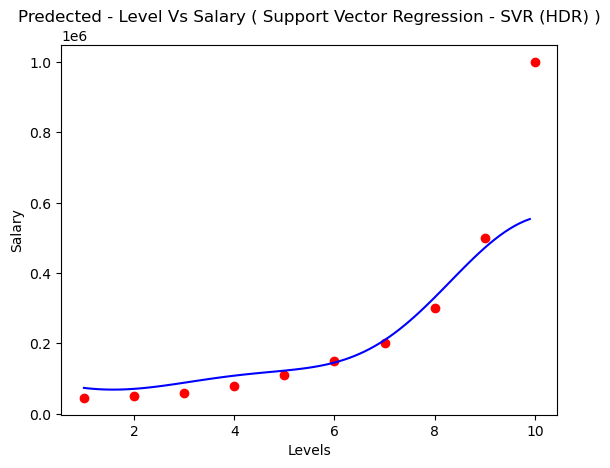

In [62]:
# we're using inverse transform because we're feature Scalling appiled for x and y data
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
# plt.plot(x_grid, lin_reg_2.predict(x_poly), color= 'blue')
plt.plot(x_grid,  sc_y.inverse_transform( regression.predict( sc_x.transform(x_grid) ).reshape(-1,1)), color= 'blue')

# adding cosmitic to visualising
plt.title("Predected - Level Vs Salary ( Support Vector Regression - SVR (HDR) )")
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()


# in above we're used our featured scalled values - x, y not actual data of X and Y

## Predecting a New Result

In [63]:
# we're using inverse transform because we're feature Scalling appiled for X and Y data
sc_y.inverse_transform( regression.predict(sc_x.transform([[6.5]])).reshape(-1,1) )

array([[170370.0204065]])